# Logistic Regression

### 1. Convert the business problem into a Data Science problem
### 2. Load the data
### 3. Understand the data
### 4. Data pre-processing
### 5. Exploratory data analysis
### 6. Model building
### 7. Predictions and Evaluations

# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


# 2. Load the Data

In [2]:
churn_data=pd.read_csv('C:/Users/HP/Desktop/ML and AI/Numyard/Churn_Modelling.csv',index_col='RowNumber')

# 3. Understanding the data

In [3]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
num_col=churn_data.select_dtypes(include=np.number).columns
print('Numerical columns :\n',num_col)
cat_col=churn_data.select_dtypes(exclude=np.number).columns
print('Categorical columns :\n',cat_col)

Numerical columns :
 Index(['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')
Categorical columns :
 Index(['Surname', 'Geography', 'Gender'], dtype='object')


# 4. Data Pre-Processing

In [7]:
## let's drop few columns which won't contribute to the model using domain knowldedge.
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [8]:
# Let's do one hot encoding for the column `Geo` as Logistic Regression model would be expecting numeric features
Geography_dummies = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])

In [9]:
# Rather than using one hot encoding we can do label encoding as well. Here let's use replace function rather than label encoder
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [10]:
churn_data_encoded = Gender_dummies
churn_data_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# 5. Exploratory Data Analysis (EDA)

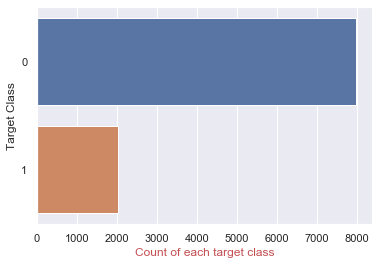

In [11]:
# Check the distribution of Y variable to see if there is a problem of imbalance class.
sns.countplot(y=churn_data_encoded.Exited,data=churn_data_encoded)
plt.xlabel('Count of each target class',color='r')
plt.ylabel('Target Class')
plt.show()

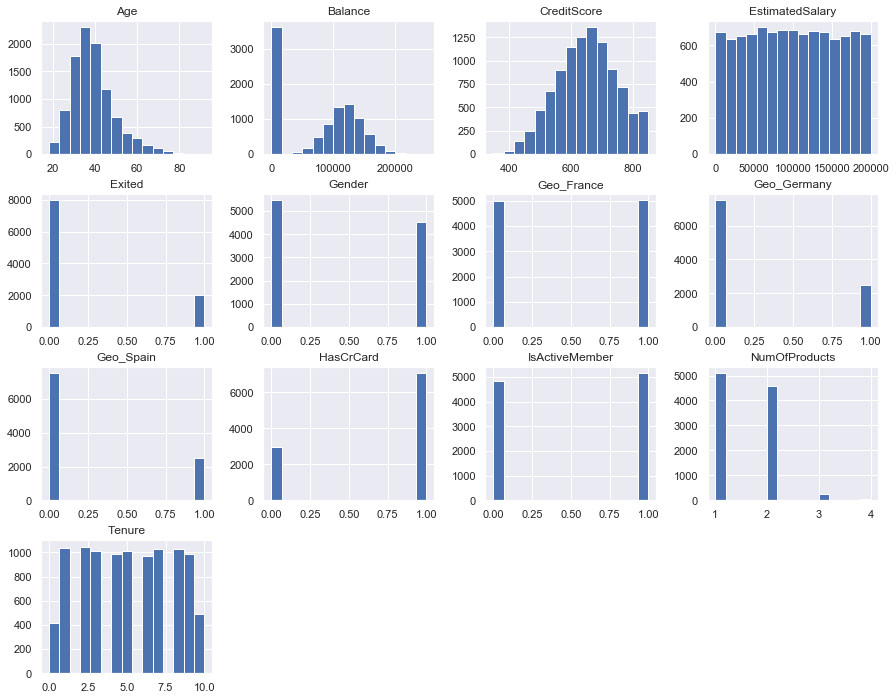

In [12]:
# Check for the distribution of all features

churn_data_encoded.hist(figsize=(15,12),bins=15)
plt.title('Features Distribution')
plt.show()

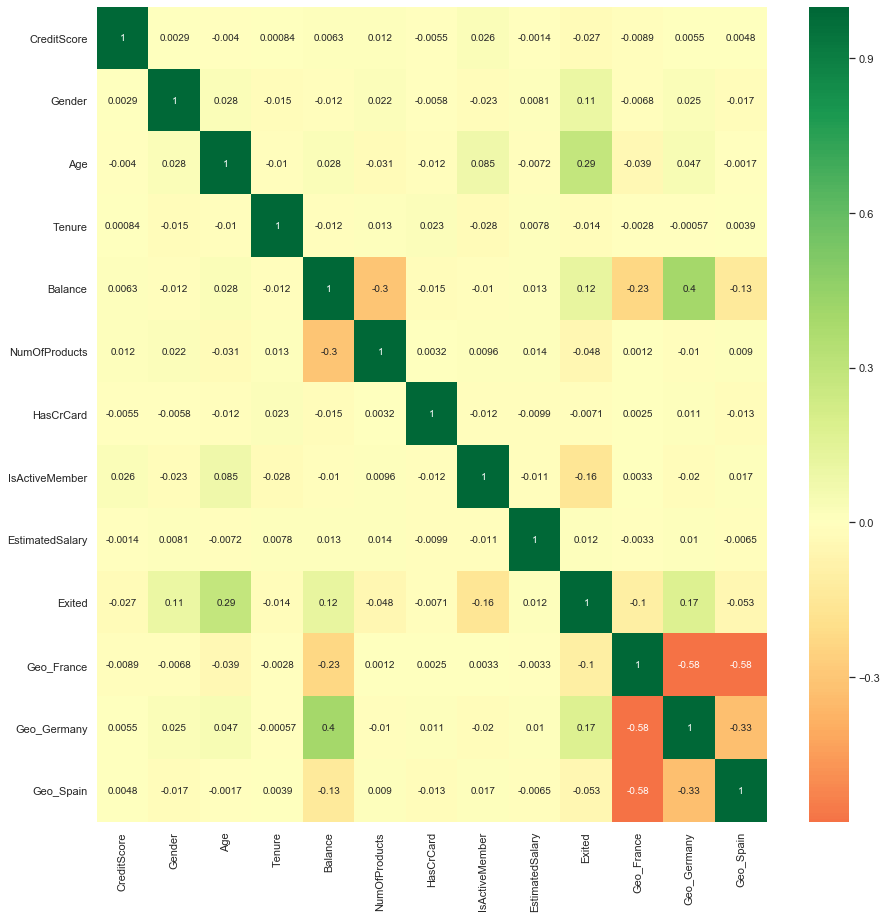

In [13]:
# Let's check the multicollinearity of features by checking the correlation matric
plt.figure(figsize=(15,15))
p=sns.heatmap(churn_data_encoded.corr(), annot=True,cmap='RdYlGn',center=0)

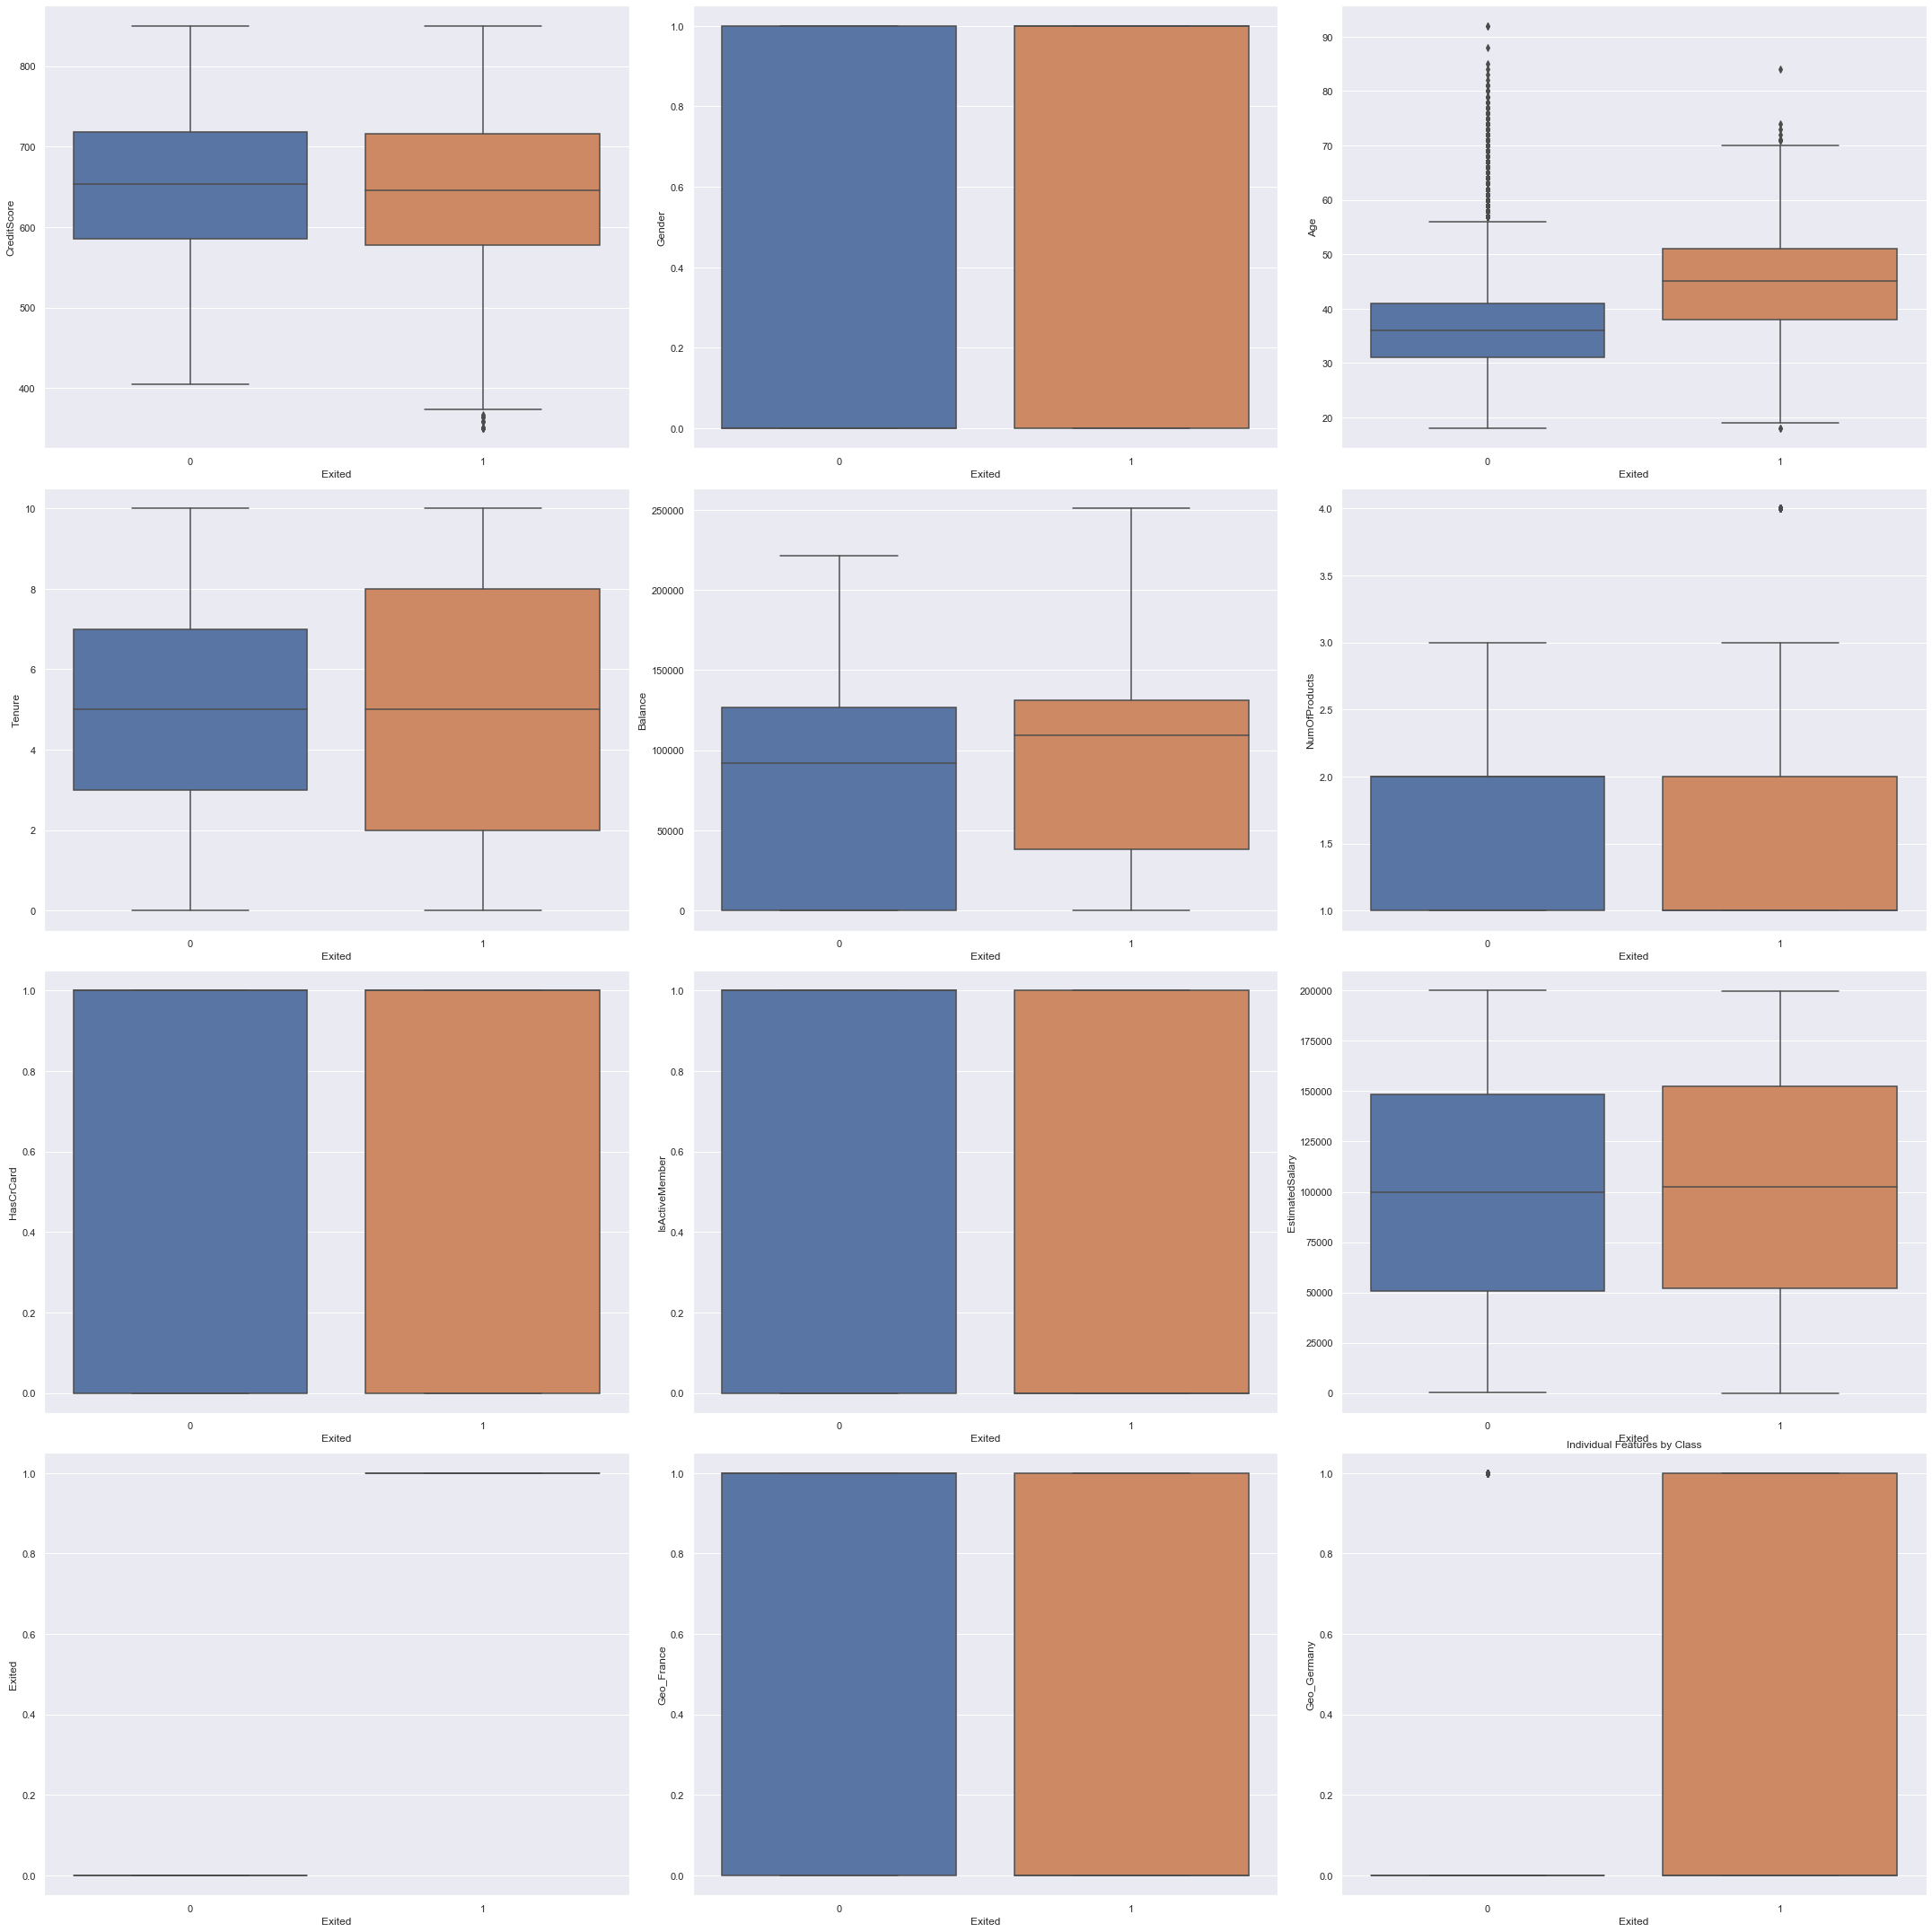

In [14]:
# Let's check the distribution of y variable corresponding to every feature/x variable
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = churn_data_encoded['Exited'], y = churn_data_encoded[churn_data_encoded.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
plt.title("Individual Features by Class")
plt.show()

# 6. Model building

In [15]:
# Seperate the y variable and X variables
x=churn_data_encoded.drop(['Exited'],axis=1)
y=churn_data_encoded.Exited

In [16]:
# Spliting the data set into train set and test set

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)

In [17]:
# feature scaling because we don't want one independent variable dominating others and it makes computation easy.

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

## Logistic Regression Classification

In [18]:
# defing the model
lr=LogisticRegression()

# Training the model
lr.fit(x_train,y_train)

LogisticRegression()

# 7. Prediction and Performance Metric

In [19]:
# Predicting target values by using x_test and our model:
y_pred0 = lr.predict(x_test)
lr_probs = lr.predict_proba(x_test)
y_pred0

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

### 1. Accuracy

In [20]:
# Checking the performance of logistic regression model
score_lr = lr.score(x_test, y_test)
print(score_lr)

0.8106060606060606


### 2. Confusion metric

In [21]:
# Python script for confusion matrix creation.
actual = y_test
predicted = y_pred0
results = confusion_matrix(actual, predicted)

print ('Confusion Matrix :')
print(results)

Confusion Matrix :
[[2532   85]
 [ 540  143]]


In [22]:
y_test.value_counts()

0    2617
1     683
Name: Exited, dtype: int64

In [23]:
np.array(np.unique(y_pred0, return_counts=True)).T

array([[   0, 3072],
       [   1,  228]], dtype=int64)

### 3. Accuracy Precision Recall F1 Score

In [24]:
print(classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2617
           1       0.63      0.21      0.31       683

    accuracy                           0.81      3300
   macro avg       0.73      0.59      0.60      3300
weighted avg       0.78      0.81      0.77      3300



# 8. Handling Class Imbalance

In [25]:
from imblearn.over_sampling import RandomOverSampler
x = churn_data_encoded.drop(['Exited'], axis = 1)
y = churn_data_encoded.Exited

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_sample(x, y)

y_ros.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [26]:
def classification_model(x,y,class_weight = None):
    
    # Splitting the dataset into the Training set and Test set
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)
    
    # Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)

    # Defining the model
    lr = LogisticRegression(class_weight = class_weight)
    
    # Training the model:
    lr.fit(x_train, y_train)
    
    # Predicting target values by using x_test and our model:
    y_pred0 = lr.predict(x_test)
    lr_probs = lr.predict_proba(x_test)
    
    results = confusion_matrix(y_test, y_pred0) 
    
    print ('Confusion Matrix :')
    print(results) 
    print ('Accuracy Score :',accuracy_score(y_test, y_pred0) )
    print ('Report : ')
    print (classification_report(y_test, y_pred0))

def performance_metric(actual,predicted):
    
    results = confusion_matrix(actual, predicted) 

    print ('Confusion Matrix :')
    print(results) 
    print ('Accuracy Score :',accuracy_score(actual, predicted) )
    print ('Report : ')
    print (classification_report(actual, predicted))

In [27]:
classification_model(x_ros,y_ros)

Confusion Matrix :
[[1878  746]
 [ 788 1844]]
Accuracy Score : 0.7081430745814308
Report : 
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2624
           1       0.71      0.70      0.71      2632

    accuracy                           0.71      5256
   macro avg       0.71      0.71      0.71      5256
weighted avg       0.71      0.71      0.71      5256

